In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import nlopt
import seaborn as sns
from statsrat import perform_oat, oat_grid, make_sim_data, learn_plot
from statsrat.expr.predef.cat import ibre, lrn_pred
from statsrat.rw.predef import smpr
import statsrat.bayes_regr as br
from statsrat.rw.fbase import elem, elem_intercept
from scipy import stats
from plotnine import ggplot, geom_point, geom_line, aes, stat_smooth, facet_wrap

In [2]:
#m = br.model(name = 'linear', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
m = br.model(name = 'linear derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

par_val = [-2, 3, 9, 5]
print(m.pars)
trials = ibre.make_trials()
#trials = lrn_pred.make_trials()
ds = m.simulate(trials = trials, par_val = par_val)

                        min   max  default
prior_tausq_inv_hpar0 -10.0   0.0     -2.0
prior_tausq_inv_hpar1   1.0  11.0      3.0
u_var                   0.0  10.0      0.1
resp_scale              0.0  10.0      1.0


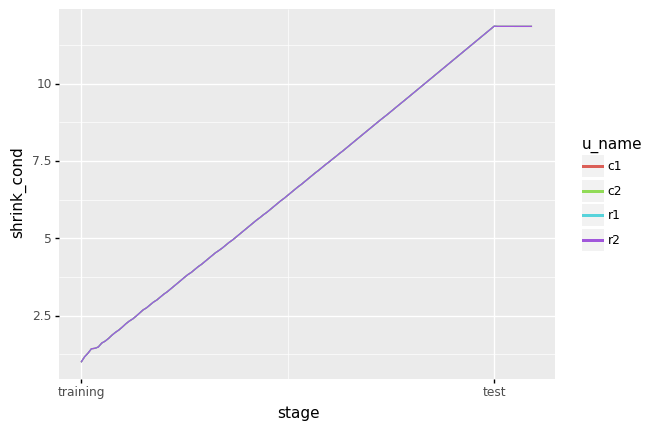

<ggplot: (279520335)>

In [3]:
var = 'shrink_cond'
#print(np.round(ds['shrink_cond'].loc[{'t': range(10)}], 0))
learn_plot(ds, var)

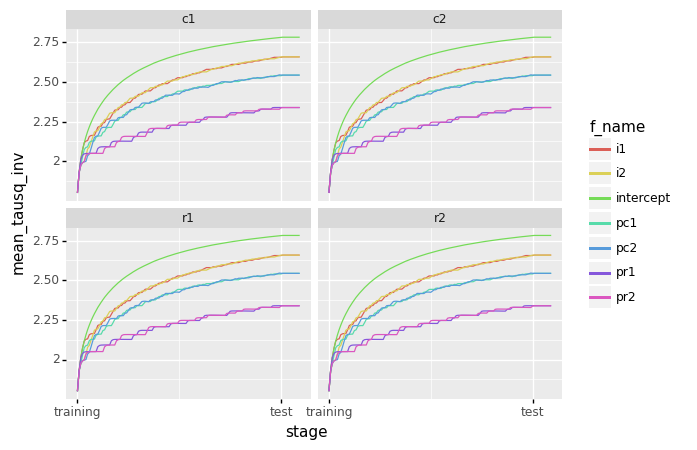

<ggplot: (303322745)>

In [5]:
var = 'mean_tausq_inv'
#print(np.round(ds[var].loc[{'t': range(10)}], 4))
learn_plot(ds, var)

In [ ]:
#var = 'mean_z'
index = ds.trial_name == 'i1.pr1 -> r1'
#index = ds.trial_name == 'i1.pc1 -> c1'
learn_plot(ds, var, sel = {'u_name': ['c1', 'r1'], 't': index})

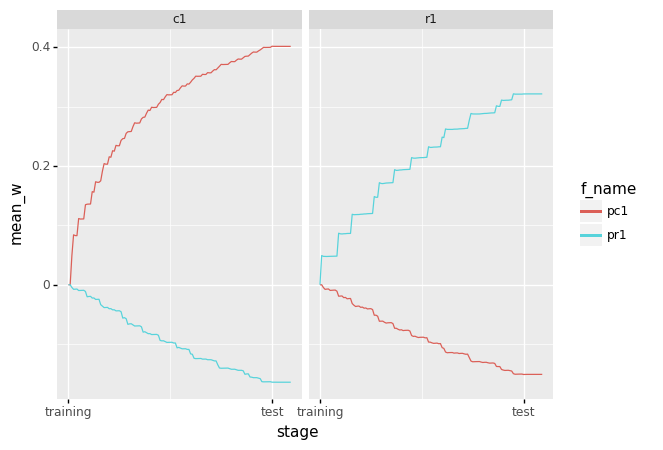

<ggplot: (279520263)>

In [4]:
var = 'mean_w'
#var = 'mean_wsq'
learn_plot(ds, var, sel = {'f_name': ['pc1', 'pr1'], 'u_name': ['c1', 'r1']})

In [6]:
# ordinal adequacy test (OAT) for the IBRE

n = 20
max_time = 300
#algorithm = nlopt.GN_DIRECT_L
#algorithm = nlopt.GN_AGS
algorithm = nlopt.GN_ORIG_DIRECT
#algorithm = nlopt.GD_STOGO

# MAKE SURE THAT I HAVEN'T PREVENTED THE MODELS FROM PRODUCING THE IBRE BY CUTTING OFF THEIR PARAMETER RANGES TOO MUCH.
m = br.model(name = 'linear', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.constant)
#m = br.model(name = 'linear derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)

oat_result = perform_oat(m, ibre, minimize = False, n = n, max_time = max_time, algorithm = algorithm)
print(oat_result[0])
print(oat_result[1])

Maximizing OAT score.
[50.005  5.     5.   ]
[83.33433333  5.          5.        ]
[16.67566667  5.          5.        ]
[50.005       8.33266667  5.        ]
[50.005       1.66733333  5.        ]
[83.33433333  8.33266667  5.        ]
[16.67566667  8.33266667  5.        ]
[83.33433333  1.66733333  5.        ]
[16.67566667  1.66733333  5.        ]
[94.44411111  8.33266667  5.        ]
[72.22455556  8.33266667  5.        ]
[83.33433333  9.44355556  5.        ]
[83.33433333  7.22177778  5.        ]
[61.11477778  8.33266667  5.        ]
[38.89522222  8.33266667  5.        ]
[50.005       9.44355556  5.        ]
[50.005       7.22177778  5.        ]
[94.44411111  9.44355556  5.        ]
[72.22455556  9.44355556  5.        ]
[94.44411111  5.          5.        ]
[72.22455556  5.          5.        ]
[83.33433333  6.11088889  5.        ]
[83.33433333  3.88911111  5.        ]
[94.44411111  7.22177778  5.        ]
[72.22455556  7.22177778  5.        ]
[98.14737037  9.44355556  5.        ]
[90.7

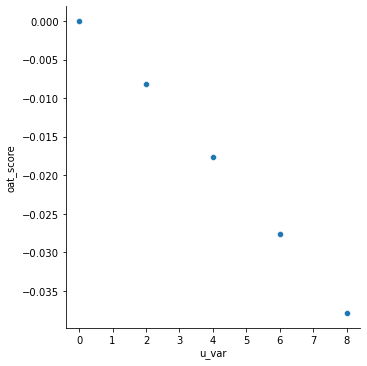

In [5]:
m = br.model(name = 'elemental derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
free_par = 'u_var'
fixed_values = {'prior_tausq_inv_hpar0': -10, 'prior_tausq_inv_hpar1': 2, 'resp_scale': 5}

df = oat_grid(m,
              ibre,
              free_par = free_par,
              fixed_values = fixed_values,
              n_points = 5)
sns.relplot(x = free_par, y = 'oat_score', data = df)

In [ ]:
# ordinal adequacy test (OAT) for learned predictiveness
n = 20
max_time = 10
algorithm = nlopt.GN_AGS
m = br.model(name = 'elemental derived attention ARD', fbase = elem, link = br.link.linear, tausq_inv_dist = br.tausq_inv_dist.ard_drv_atn)
oat_result = perform_oat(m, lrn_pred, n = n, max_time = max_time, algorithm = algorithm, minimize = False)
print(oat_result[0])
print(oat_result[1])